___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [52]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import dtreeviz.trees
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
import requests

**Відкрийте файл та виведіть описову статистику**

In [2]:
data=pd.read_csv('loan_data.csv')

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
data.corr(method = 'spearman')

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.287878,0.073698,0.029398,-0.080286,0.352399,0.112885,-0.009222,-0.102636,-0.433860,-0.057772,-0.048692,-0.158119
int.rate,-0.287878,1.000000,0.242914,0.041648,0.216114,-0.744986,-0.133584,0.148719,0.472965,0.174137,0.172677,0.093887,0.152725
installment,0.073698,0.242914,1.000000,0.431405,0.062547,0.085257,0.201920,0.351844,0.096013,-0.006740,-0.007541,-0.027854,0.040404
log.annual.inc,0.029398,0.041648,0.431405,1.000000,-0.059672,0.107878,0.400251,0.415817,0.053172,0.030574,0.029732,0.013282,-0.035534
dti,-0.080286,0.216114,0.062547,-0.059672,1.000000,-0.214496,0.072858,0.375950,0.333655,0.028044,-0.018420,0.009311,0.035899
fico,0.352399,-0.744986,0.085257,0.107878,-0.214496,1.000000,0.251729,-0.094562,-0.520085,-0.173743,-0.237059,-0.148294,-0.147920
days.with.cr.line,0.112885,-0.133584,0.201920,0.400251,0.072858,0.251729,1.000000,0.323954,-0.004041,-0.042324,0.094645,0.101549,-0.025379
revol.bal,-0.009222,0.148719,0.351844,0.415817,0.375950,-0.094562,0.323954,1.000000,0.514898,-0.023088,-0.053657,-0.025633,0.020440
revol.util,-0.102636,0.472965,0.096013,0.053172,0.333655,-0.520085,-0.004041,0.514898,1.000000,-0.016175,-0.032189,0.071434,0.081448
inq.last.6mths,-0.433860,0.174137,-0.006740,0.030574,0.028044,-0.173743,-0.042324,-0.023088,-0.016175,1.000000,0.021115,0.055862,0.131478


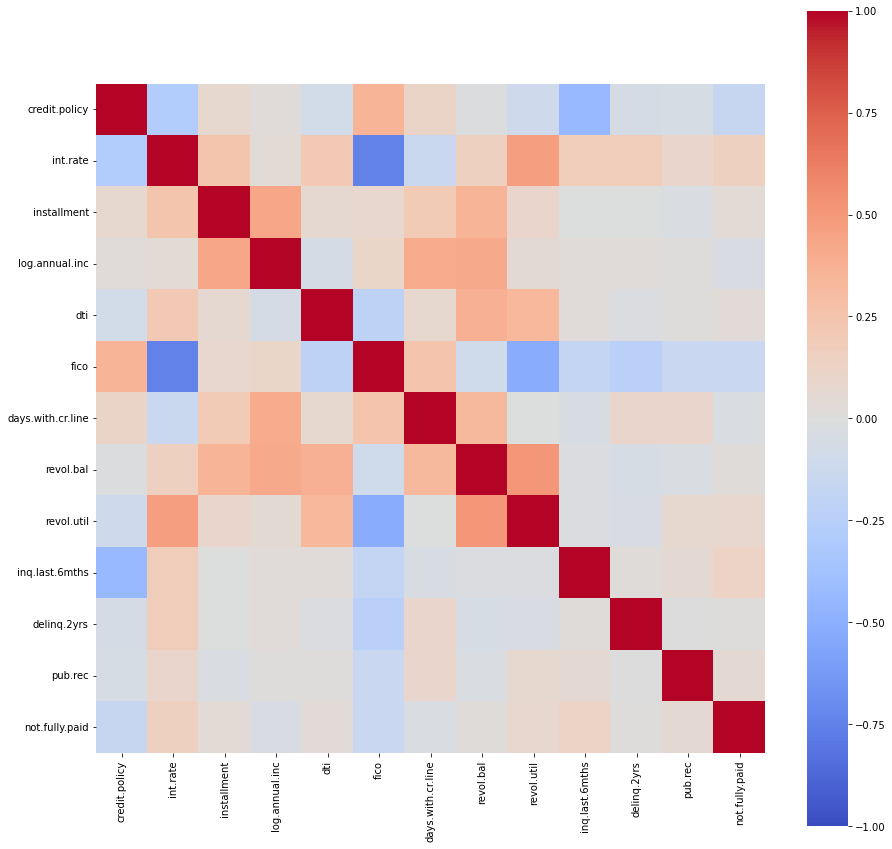

In [6]:
corr = data.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (15, 15))
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.color_palette("coolwarm", as_cmap = True), square = True)

**Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну**

<AxesSubplot:xlabel='fico', ylabel='Count'>

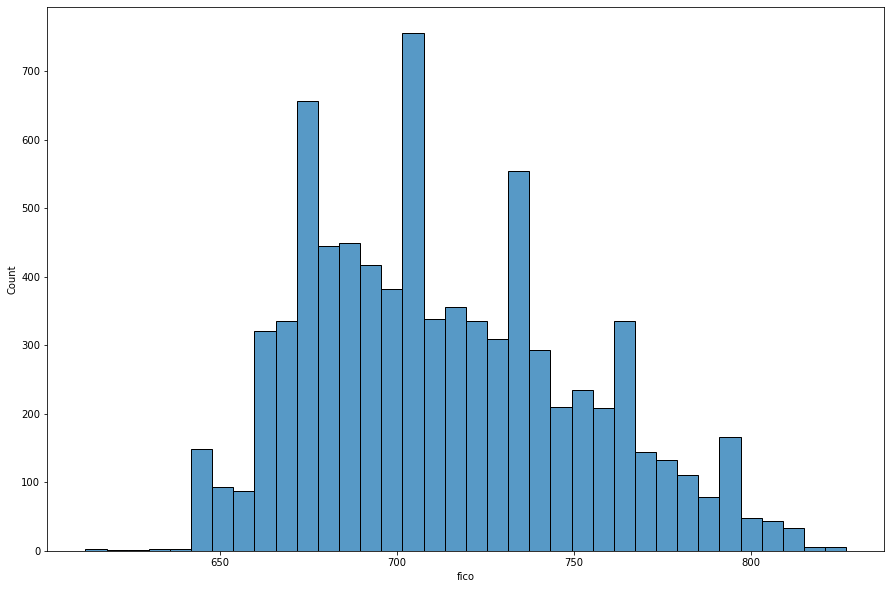

In [7]:
data_paid0 = data[data['not.fully.paid'] == 0]
fig, ax = plt.subplots(figsize = (15, 10))
sns.histplot(data = data_paid0, x = 'fico', ax = ax)

<AxesSubplot:xlabel='fico', ylabel='Count'>

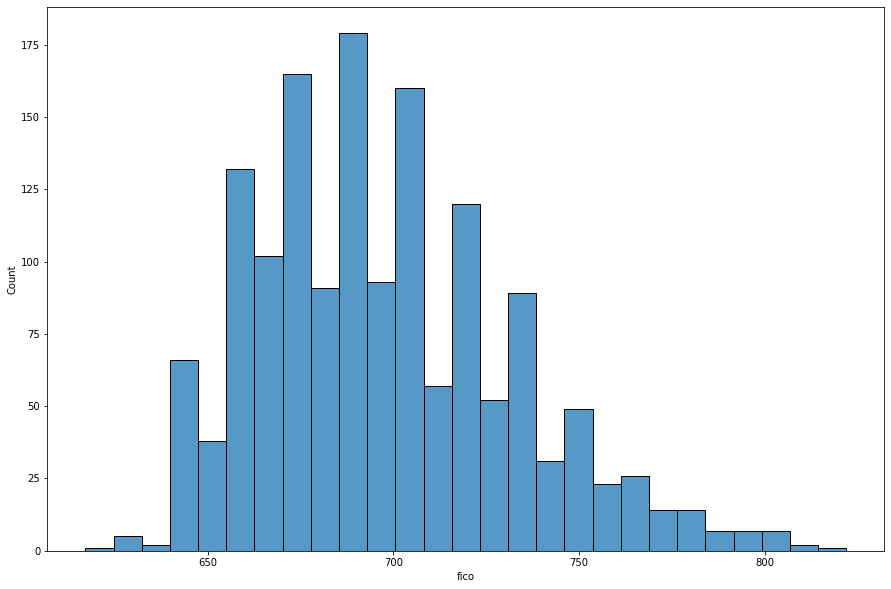

In [8]:
data_paid1 = data[data['not.fully.paid'] == 1]
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(data = data_paid1, x = 'fico', ax = ax)

<AxesSubplot:xlabel='fico', ylabel='Count'>

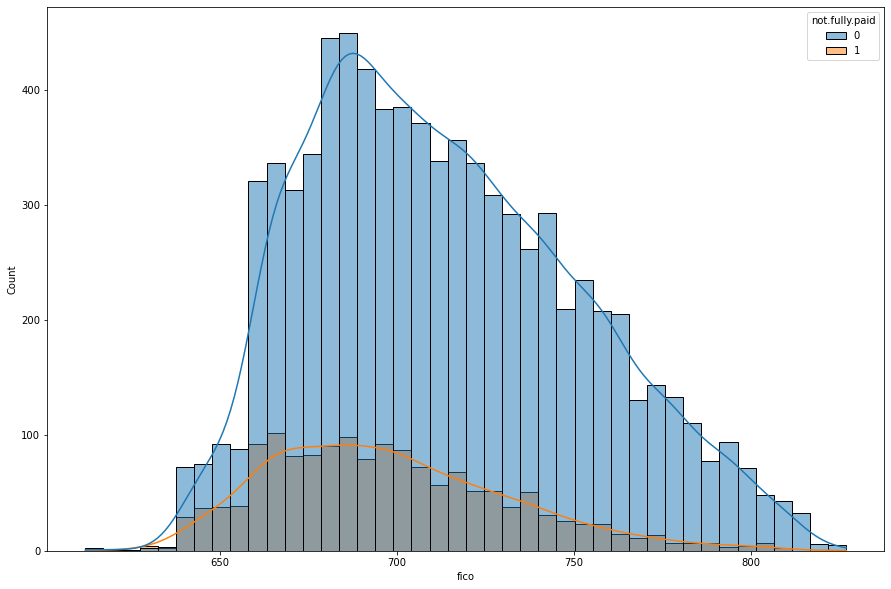

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(data = data, x = "fico", hue = "not.fully.paid", kde = True)

**Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot**

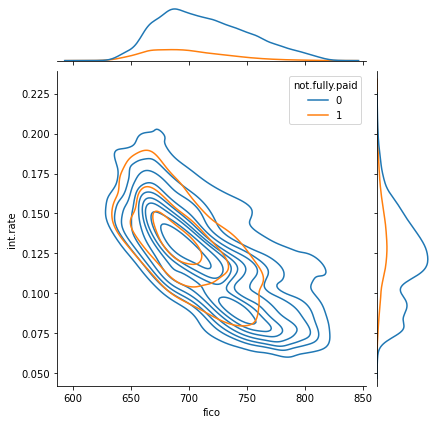

In [10]:
#fig, ax = plt.subplots(figsize=(15, 10))
sns.jointplot(data = data, x = "fico", y = "int.rate", hue = "not.fully.paid", kind="kde")

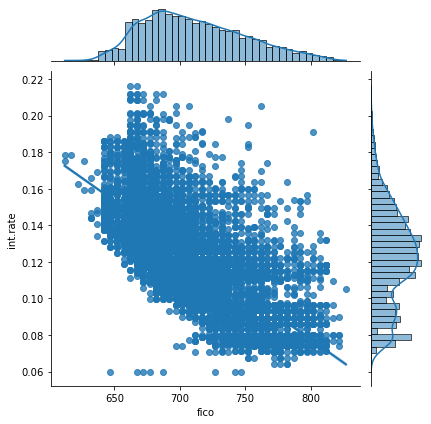

In [11]:
sns.jointplot(data = data, x = "fico", y = "int.rate", kind="reg")

**Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції**

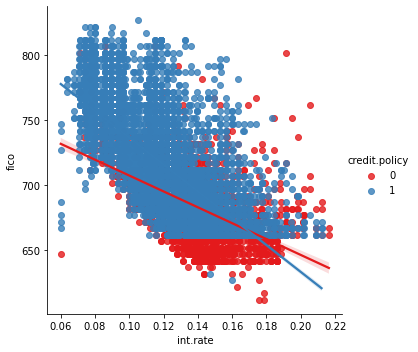

In [12]:
sns.lmplot(data = data, x = 'int.rate', y = 'fico', hue = 'credit.policy', palette = "Set1")

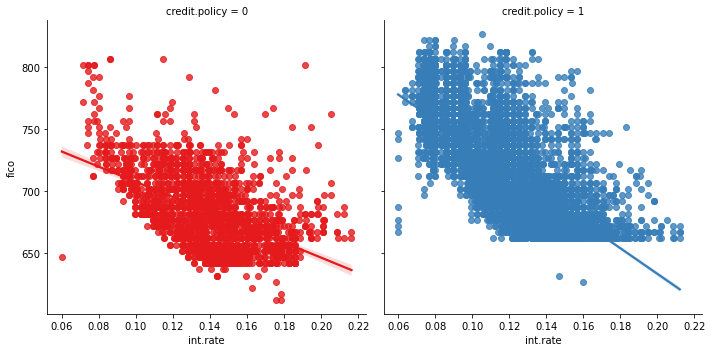

In [13]:
sns.lmplot(data = data, x = 'int.rate', y = 'fico', col = 'credit.policy', hue = 'credit.policy', palette = "Set1")

**У purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies**

In [14]:
data_dum = pd.get_dummies(data, columns=['purpose'])

In [15]:
data_dum.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [16]:
print(data_dum.columns)

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')


**Розбийте датасет на тестові та тренувальні дані**

In [17]:
X1 = data_dum[data_dum.columns[data_dum.columns!='not.fully.paid']]
y1 = data_dum[['not.fully.paid']]

In [18]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3)

**Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost**

Дерево рішень

In [19]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X1_train,y1_train)
dtc_y1_pred = dtc.predict(X1_test)

In [20]:
print(dtc.score(X1_test, y1_test))

0.7352122477383438


In [21]:
print(classification_report(y1_test, dtc_y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2400
           1       0.23      0.26      0.24       474

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.74      2874



In [22]:
dtc_cm = confusion_matrix(y1_test, dtc_y1_pred)

Text(0.5, 1.0, 'Точність передбачення: 0.7352122477383438')

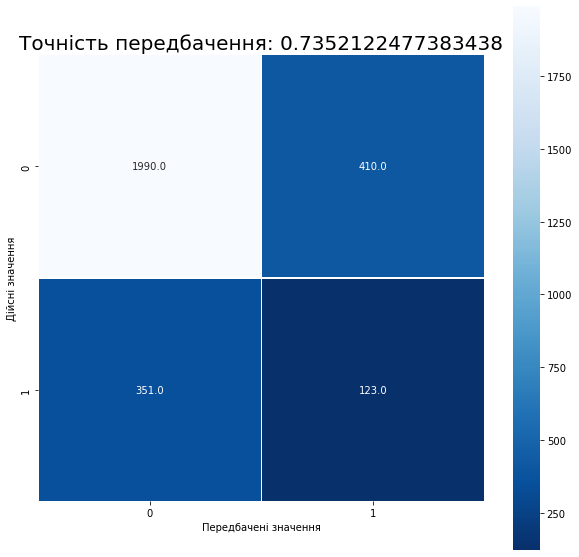

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(dtc_cm, annot = True, fmt = ".1f", linewidths = .1, square = True, cmap = 'Blues_r');
plt.ylabel('Дійсні значення');
plt.xlabel('Передбачені значення');
all_sample_title = 'Точність передбачення: {0}'.format(dtc.score(X1_test, y1_test))
plt.title(all_sample_title, size = 20)

Логістична регресія

In [31]:
lgr = LogisticRegression()
lgr = lgr.fit(X1_train,y1_train)
lgr_y1_pred = lgr.predict(X1_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
print(lgr.score(X1_test, y1_test))

0.8336812804453723


In [33]:
print(classification_report(y1_test, lgr_y1_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2400
           1       0.30      0.01      0.01       474

    accuracy                           0.83      2874
   macro avg       0.57      0.50      0.46      2874
weighted avg       0.75      0.83      0.76      2874



In [34]:
lgr_cm = confusion_matrix(y1_test, lgr_y1_pred)

Text(0.5, 1.0, 'Точність передбачення: 0.8336812804453723')

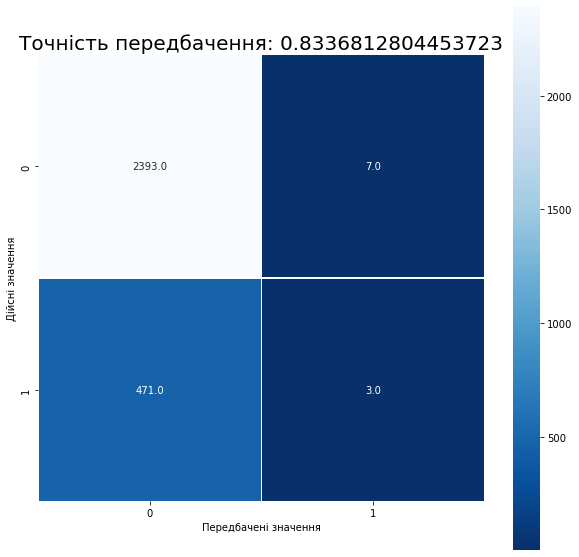

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(lgr_cm, annot = True, fmt = ".1f", linewidths = .1, square = True, cmap = 'Blues_r');
plt.ylabel('Дійсні значення');
plt.xlabel('Передбачені значення');
all_sample_title = 'Точність передбачення: {0}'.format(lgr.score(X1_test, y1_test))
plt.title(all_sample_title, size = 20)

Випадковий ліс

In [36]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1234)
rf = rf.fit(X1_train,y1_train)
rf_y1_pred = rf.predict(X1_test)

<ipython-input-36-752dc1aae9a1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X1_train,y1_train)


In [37]:
print(rf.score(X1_test, y1_test))

0.8333333333333334


In [38]:
print(classification_report(y1_test, rf_y1_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2400
           1       0.37      0.01      0.03       474

    accuracy                           0.83      2874
   macro avg       0.60      0.50      0.47      2874
weighted avg       0.76      0.83      0.76      2874



In [39]:
rf_cm = confusion_matrix(y1_test, rf_y1_pred)

Text(0.5, 1.0, 'Точність передбачення: 0.8333333333333334')

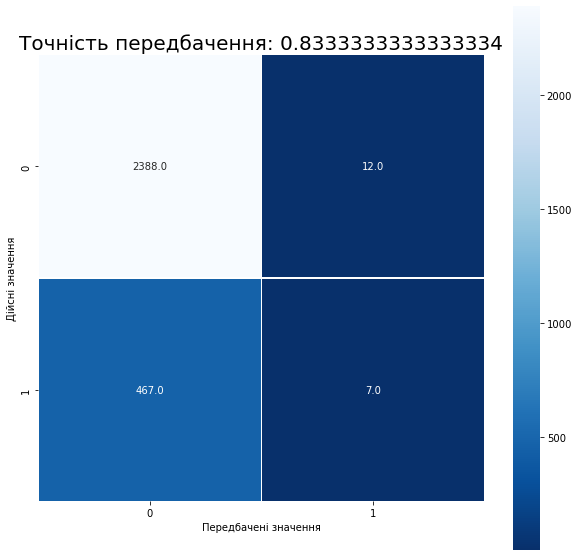

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(rf_cm, annot = True, fmt = ".1f", linewidths = .1, square = True, cmap = 'Blues_r');
plt.ylabel('Дійсні значення');
plt.xlabel('Передбачені значення');
all_sample_title = 'Точність передбачення: {0}'.format(rf.score(X1_test, y1_test))
plt.title(all_sample_title, size = 20)

Градієнтний бустінг

In [41]:
gb = XGBClassifier()
gb = gb.fit(X1_train,y1_train)
gb_y1_pred = gb.predict(X1_test)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[12:12:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
print(gb.score(X1_test, y1_test))

0.8190675017397355


In [43]:
print(classification_report(y1_test, gb_y1_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2400
           1       0.32      0.09      0.14       474

    accuracy                           0.82      2874
   macro avg       0.58      0.53      0.52      2874
weighted avg       0.76      0.82      0.77      2874



In [44]:
gb_cm = confusion_matrix(y1_test, gb_y1_pred)

Text(0.5, 1.0, 'Точність передбачення: 0.8190675017397355')

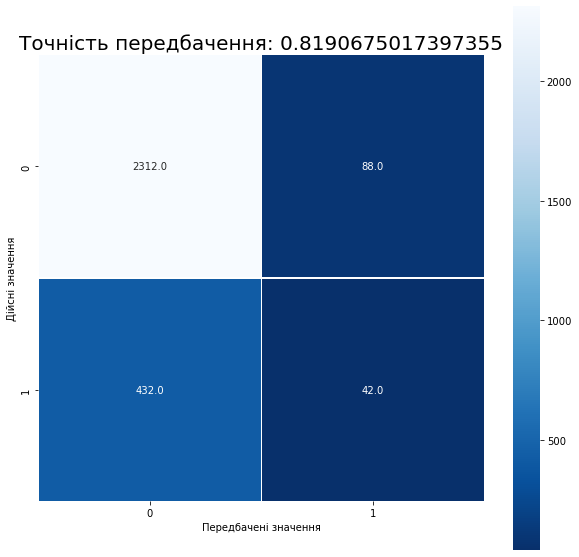

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(gb_cm, annot = True, fmt = ".1f", linewidths = .1, square = True, cmap = 'Blues_r');
plt.ylabel('Дійсні значення');
plt.xlabel('Передбачені значення');
all_sample_title = 'Точність передбачення: {0}'.format(gb.score(X1_test, y1_test))
plt.title(all_sample_title, size = 20)

Використайте ансамбль voting для всіх моделей¶

In [47]:
ansv = VotingClassifier(estimators=[('dtc', dtc), ('lgr', lgr), ('rf', rf), ('gb', gb)])
ansv = ansv.fit(X1_train,y1_train)
ansv_y1_pred = ansv.predict(X1_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
print(ansv.score(X1_test, y1_test))

0.8340292275574113


In [49]:
print(classification_report(y1_test, ansv_y1_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2400
           1       0.40      0.01      0.02       474

    accuracy                           0.83      2874
   macro avg       0.62      0.50      0.47      2874
weighted avg       0.76      0.83      0.76      2874



In [50]:
ansv_cm = confusion_matrix(y1_test, ansv_y1_pred)

Text(0.5, 1.0, 'Точність передбачення: 0.8340292275574113')

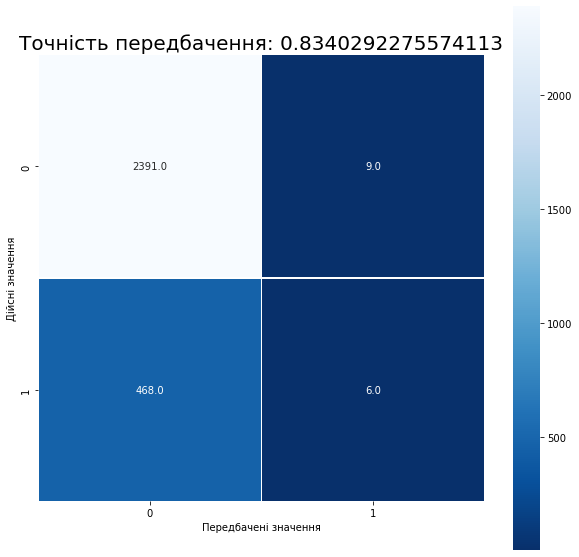

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(ansv_cm, annot = True, fmt = ".1f", linewidths = .1, square = True, cmap = 'Blues_r');
plt.ylabel('Дійсні значення');
plt.xlabel('Передбачені значення');
all_sample_title = 'Точність передбачення: {0}'.format(ansv.score(X1_test, y1_test))
plt.title(all_sample_title, size = 20)

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [53]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [54]:
req = requests.get(url)

In [55]:
data = pd.read_csv(url)
data

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


Виведіть список унікальних міст з датасету

In [57]:
data['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

Виведіть дату початку та кінця ведення даних

In [58]:
data['date.utc'] = pd.to_datetime(data['date.utc'])

In [60]:
data['date.utc'].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [61]:
data['date.utc'].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

Яка середня конценрація 𝑁𝑂2 для кожного дня тижня і міста (виведіть таблицю)?

In [62]:
data['weekday'] = data['date.utc'].dt.dayofweek

In [63]:
data.groupby(['city', 'weekday'])['value'].mean()

city       weekday
Antwerpen  0          27.875000
           1          22.214286
           2          21.125000
           3          27.500000
           4          28.400000
           5          33.500000
           6          21.896552
London     0          23.969697
           1          24.885714
           2          23.460432
           3          24.780142
           4          26.446809
           5          24.977612
           6          24.859155
Paris      0          24.856250
           1          30.999359
           2          29.165753
           3          28.600690
           4          31.617986
           5          25.266154
           6          23.274306
Name: value, dtype: float64

Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

<AxesSubplot:xlabel='weekday'>

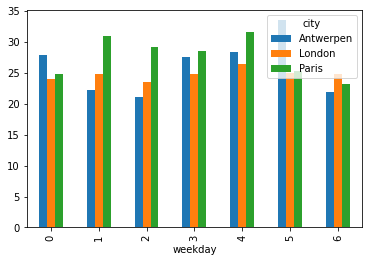

In [64]:
data.groupby(['city', 'weekday'])['value'].mean().unstack(level=0).plot.bar(stacked=False)